## Final Project Submission

Please fill out:
* Student name: Fabian Werkmeister


# Table of contents

- starting off with a business case ("I.") and basic setup ("II.")
- then followed by a classic datascience-lifecycle-approach, as following

---

1. Business Knowledge - getting a basic idea of real estate industry
2. Data mining - dataset is public, so no boundaries
3. Data cleaning - several inconcistencies have to be fixed
4. Data exploration - lots of variables have to be explored
5. Feature engineering - creating new variables out of existing ones, to create a meaningful model afterwards
6. Predictive modeling - testing several variables and consecutively evaluating the model in order to find the best fit for a linear regression model with multiple variables
7. Visualization - can be found in this repository as pdf-file "King County Real Estate Presentation.pdf"

# I. Business Case

Imagine a real estate agency

---

- they operate for years in high price segment, but aren't specialized in luxury listings nor have an exclusive network or access to VIPs/celebrities 

- they have little to no digital documentation of customer data and heavily dependent on expertise and knowledge of skilled realtors

- the CEO saw a TV report about data science and now want to get to know what data science is in order to evaluate if data science can be beneficial to them and/or reveal anything new to them

- in this context they want you to implement an easy framework for sales predictions, which their realtors can use. Since their realtors like to stick to their well-proven (non-digital) methods, you have to create a model, which beats their expertise.

---

Objectives are:

- Identify relevant factors, which effectively predict sales prices:
- -->What are the objective factors that determine sales prices in the high price real estate segment

- What impact do these factors have?
- --> How and to which extent do these factors contribute to sales prices

- Identifiy suitable neighbourhoods for investment:
- --> Which neighbourhoods and locations in King County should be focused on



# II. Basic Setup

##### Importing Python Libraries needed for project

In [81]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import geopandas as gpd
import descartes
import shapefile as shp
from matplotlib.patches import Rectangle
import statsmodels.formula.api as smf
import sklearn
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

##### Supress scientific notation

In [2]:
# show numbers with 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 1. Business Knowledge

get a basic idea, of how real estate / housing works
- https://www.opendoor.com/w/blog/factors-that-influence-home-value
- https://www.propertygeek.net/blog/determines-rents-house-prices/

# 2. Data Mining

##### Read dataset

In [3]:
df = pd.read_csv ("King_County_House_prices_dataset.csv")
experimental_df = pd.read_csv ("King_County_House_prices_dataset.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,6/27/2014,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
7,2008000270,1/15/2015,291850.000,3,1.500,1060,9711,1.000,0.000,nan,...,7,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
8,2414600126,4/15/2015,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,7,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113
9,3793500160,3/12/2015,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,7,1890,0.0,2003,0.000,98038,47.368,-122.031,2390,7570


##### First look at data

In [4]:
df.info()
print("----------------------------------------------------------")
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
------------

(21597, 21)

# 3. Data Cleaning

In [5]:
# rename the two sqft_living variables in order to distinguish them later on
df.rename(columns={ df.columns[5]: "sqft_livingsquare" }, inplace = True)
df.rename(columns={ df.columns[19]: "sqft_living15" }, inplace = True)
df

,id,date,price,bedrooms,bathrooms,sqft_livingsquare,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,6/27/2014,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
7,2008000270,1/15/2015,291850.000,3,1.500,1060,9711,1.000,0.000,nan,...,7,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
8,2414600126,4/15/2015,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,7,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113
9,3793500160,3/12/2015,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,7,1890,0.0,2003,0.000,98038,47.368,-122.031,2390,7570


In [6]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_livingsquare,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,6/27/2014,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
7,2008000270,1/15/2015,291850.000,3,1.500,1060,9711,1.000,0.000,nan,...,7,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
8,2414600126,4/15/2015,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,7,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113
9,3793500160,3/12/2015,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,7,1890,0.0,2003,0.000,98038,47.368,-122.031,2390,7570


In [7]:
# "condition" and "grade" didn't get printed, so temporarily show all columns for verification
pd.options.display.max_columns = None

print (df)

#reset option
pd.reset_option("display.max_columns")


               id        date       price  bedrooms  bathrooms  \
0      7129300520  10/13/2014  221900.000         3      1.000   
1      6414100192   12/9/2014  538000.000         3      2.250   
2      5631500400   2/25/2015  180000.000         2      1.000   
3      2487200875   12/9/2014  604000.000         4      3.000   
4      1954400510   2/18/2015  510000.000         3      2.000   
5      7237550310   5/12/2014 1230000.000         4      4.500   
6      1321400060   6/27/2014  257500.000         3      2.250   
7      2008000270   1/15/2015  291850.000         3      1.500   
8      2414600126   4/15/2015  229500.000         3      1.000   
9      3793500160   3/12/2015  323000.000         3      2.500   
10     1736800520    4/3/2015  662500.000         3      2.500   
11     9212900260   5/27/2014  468000.000         2      1.000   
12      114101516   5/28/2014  310000.000         3      1.000   
13     6054650070   10/7/2014  400000.000         3      1.750   
14     117

In [8]:
# checking if dataframe doesn't end with text or anything other
df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_livingsquare,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21587,7852140040,8/25/2014,507250.000,3,2.500,2270,5536,2.000,nan,0.000,...,8,2270,0.0,2003,0.000,98065,47.539,-121.881,2270,5731
21588,9834201367,1/26/2015,429000.000,3,2.000,1490,1126,3.000,0.000,0.000,...,8,1490,0.0,2014,0.000,98144,47.570,-122.288,1400,1230
21589,3448900210,10/14/2014,610685.000,4,2.500,2520,6023,2.000,0.000,nan,...,9,2520,0.0,2014,0.000,98056,47.514,-122.167,2520,6023
21590,7936000429,3/26/2015,1010000.000,4,3.500,3510,7200,2.000,0.000,0.000,...,9,2600,910.0,2009,0.000,98136,47.554,-122.398,2050,6200
21591,2997800021,2/19/2015,475000.000,3,2.500,1310,1294,2.000,0.000,0.000,...,8,1180,130.0,2008,0.000,98116,47.577,-122.409,1330,1265
21592,263000018,5/21/2014,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,...,8,1530,0.0,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,...,8,2310,0.0,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,...,7,1020,0.0,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,1/16/2015,400000.000,3,2.500,1600,2388,2.000,nan,0.000,...,8,1600,0.0,2004,0.000,98027,47.535,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.000,2,0.750,1020,1076,2.000,0.000,0.000,...,7,1020,0.0,2008,0.000,98144,47.594,-122.299,1020,1357


In [9]:
#Convert date to datetime

datenew =  pd.to_datetime(df['date'], format='%m/%d/%Y')
df["date"] = datenew

# confirm if transformation happened
df.dtypes

id                            int64
date                 datetime64[ns]
price                       float64
bedrooms                      int64
bathrooms                   float64
sqft_livingsquare             int64
sqft_lot                      int64
floors                      float64
waterfront                  float64
view                        float64
condition                     int64
grade                         int64
sqft_above                    int64
sqft_basement                object
yr_built                      int64
yr_renovated                float64
zipcode                       int64
lat                         float64
long                        float64
sqft_living15                 int64
sqft_lot15                    int64
dtype: object

In [10]:
# Task 2 - convert sqft_basement to int

# apparently string in sqft_basement --> 454 occurences of "?"
df["sqft_basement"].value_counts()


#print distribution wihtout "?"-string in test_dataframe
experimental_df = experimental_df.drop(experimental_df[experimental_df.sqft_basement == "?"].index)
experimental_df["sqft_basement"] = experimental_df["sqft_basement"].astype("float")
experimental_df["sqft_basement"].describe()

# at least 50% of houses have no basement, so we'll replace "?" with 0 and convert to float

df["sqft_basement"] = df["sqft_basement"].replace("?","0")
df["sqft_basement"] = df["sqft_basement"].astype("float").astype("int")
df.dtypes


id                            int64
date                 datetime64[ns]
price                       float64
bedrooms                      int64
bathrooms                   float64
sqft_livingsquare             int64
sqft_lot                      int64
floors                      float64
waterfront                  float64
view                        float64
condition                     int64
grade                         int64
sqft_above                    int64
sqft_basement                 int64
yr_built                      int64
yr_renovated                float64
zipcode                       int64
lat                         float64
long                        float64
sqft_living15                 int64
sqft_lot15                    int64
dtype: object


Preview of data with null values:
xxxxxxxxxxxxx
           id       date      price  bedrooms  bathrooms  sqft_livingsquare  \
0  7129300520 2014-10-13 221900.000         3      1.000               1180   
2  5631500400 2015-02-25 180000.000         2      1.000                770   
7  2008000270 2015-01-15 291850.000         3      1.500               1060   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650   1.000         nan 0.000  ...      7        1180              0   
2     10000   1.000       0.000 0.000  ...      6         770              0   
7      9711   1.000       0.000   nan  ...      7        1060              0   

   yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0      1955         0.000    98178 47.511 -122.257           1340        5650  
2      1933           nan    98028 47.738 -122.233           2720        8062  
7      1963         0.000    98198 47.410 -122.315           1650        

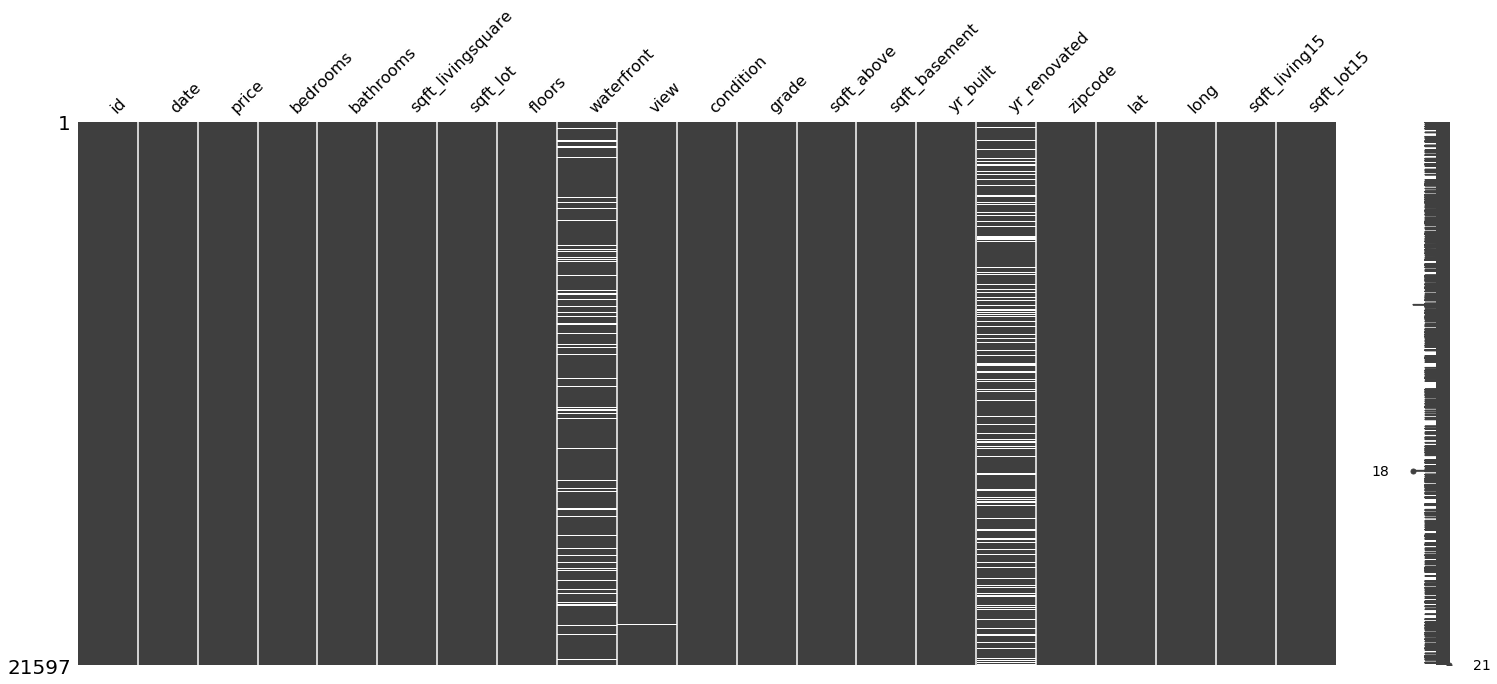

yr_renovated         3842
waterfront           2376
view                   63
sqft_lot15              0
date                    0
price                   0
bedrooms                0
bathrooms               0
sqft_livingsquare       0
sqft_lot                0
floors                  0
condition               0
sqft_living15           0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
zipcode                 0
lat                     0
long                    0
id                      0
dtype: int64


In [11]:
# Task 3 - visualize missing values and handle them

# Internet research revealed package missingno for visualization


# generate preview of entries with null values
if len(df[df.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()
    
missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data)

##### --> As expected "waterfront", "yr_renovated" and "view" have missing values, number and visualization is shown above

In [27]:
# handle yr_renovated
print(df.yr_renovated.describe())

# at least 75% of houses haven't been renovated, so replace missing values with 0 and convert to float
df["yr_renovated"] = df["yr_renovated"].fillna("0")
df["yr_renovated"] = df["yr_renovated"].astype("float")

# handle waterfront
print(df.waterfront.describe())

# at least 75% of houses haven't got a waterfront, so replace missing values with 0
df["waterfront"] = df["waterfront"].fillna("0")
df["waterfront"] = df["waterfront"].astype("float")
df

# handle yr_renovated
print(df.view.describe())

# at least 75% of houses haven't been viewed, so replace missing values with 0
df["view"] = df["view"].fillna("0")
df["view"] = df["view"].astype("float")
df

count   21596.000
mean       68.761
std       364.046
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      2015.000
Name: yr_renovated, dtype: float64
count   21596.000
mean        0.007
std         0.082
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: waterfront, dtype: float64


/Users/fabianwerkmeister/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/fabianwerkmeister/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/fabianwerkmeister/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


count   21596.000
mean        0.233
std         0.765
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         4.000
Name: view, dtype: float64


/Users/fabianwerkmeister/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,date,price,bedrooms,bathrooms,sqft_livingsquare,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0.000,0.000,...,1180,0,1955,0.000,98178,47.511,-122.257,1340,5650,POINT (-122.25700 47.51120)
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,2170,400,1951,1991.000,98125,47.721,-122.319,1690,7639,POINT (-122.31900 47.72100)
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,770,0,1933,0.000,98028,47.738,-122.233,2720,8062,POINT (-122.23300 47.73790)
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,1050,910,1965,0.000,98136,47.521,-122.393,1360,5000,POINT (-122.39300 47.52080)
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,1680,0,1987,0.000,98074,47.617,-122.045,1800,7503,POINT (-122.04500 47.61680)
5,7237550310,2014-05-12,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,3890,1530,2001,0.000,98053,47.656,-122.005,4760,101930,POINT (-122.00500 47.65610)
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,1715,0,1995,0.000,98003,47.310,-122.327,2238,6819,POINT (-122.32700 47.30970)
7,2008000270,2015-01-15,291850.000,3,1.500,1060,9711,1.000,0.000,0.000,...,1060,0,1963,0.000,98198,47.410,-122.315,1650,9711,POINT (-122.31500 47.40950)
8,2414600126,2015-04-15,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,1050,730,1960,0.000,98146,47.512,-122.337,1780,8113,POINT (-122.33700 47.51230)
9,3793500160,2015-03-12,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,1890,0,2003,0.000,98038,47.368,-122.031,2390,7570,POINT (-122.03100 47.36840)


In [13]:
# check again for missings
    
missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data)

# all missing values have been replaced

sqft_lot15           0
view                 0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_livingsquare    0
sqft_lot             0
floors               0
waterfront           0
condition            0
sqft_living15        0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
id                   0
dtype: int64


In [14]:
# exclude huge outlier "33" in bedrooms
# value was noticed in EDA
df = df[df.bedrooms != 33]

##### Data cleaning finalized

# 4. Data Exploration

In [15]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_livingsquare,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000
mean,4580575157.071,540291.957,3.372,2.116,2080.343,15099.830,1.494,0.007,0.233,3.410,7.658,1788.632,285.703,1971.001,68.761,98077.951,47.560,-122.214,1986.651,12758.657
std,2876764127.563,367376.019,0.904,0.769,918.122,41413.549,0.540,0.082,0.765,0.650,1.173,827.763,439.825,29.375,364.046,53.514,0.139,0.141,685.232,27275.018
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049166.750,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930470.000,450000.000,3.000,2.250,1910.000,7619.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308950385.000,645000.000,4.000,2.500,2550.000,10685.500,2.000,0.000,0.000,4.000,8.000,2210.000,550.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,11.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [16]:
df["price"].describe()

count     21596.000
mean     540291.957
std      367376.019
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

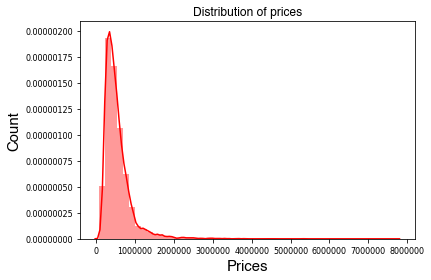

In [17]:
# plot distribution of price

fig, ax = plt.subplots()
fig = sns.distplot(df.price, color="r")
hfont = {'fontname':'Helvetica'}
plt.title('Distribution of prices',**hfont)
ax.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Prices', fontsize=15, **hfont)
plt.ylabel('Count', fontsize=15, **hfont)
plt.savefig("figures/distribution_prices.png")

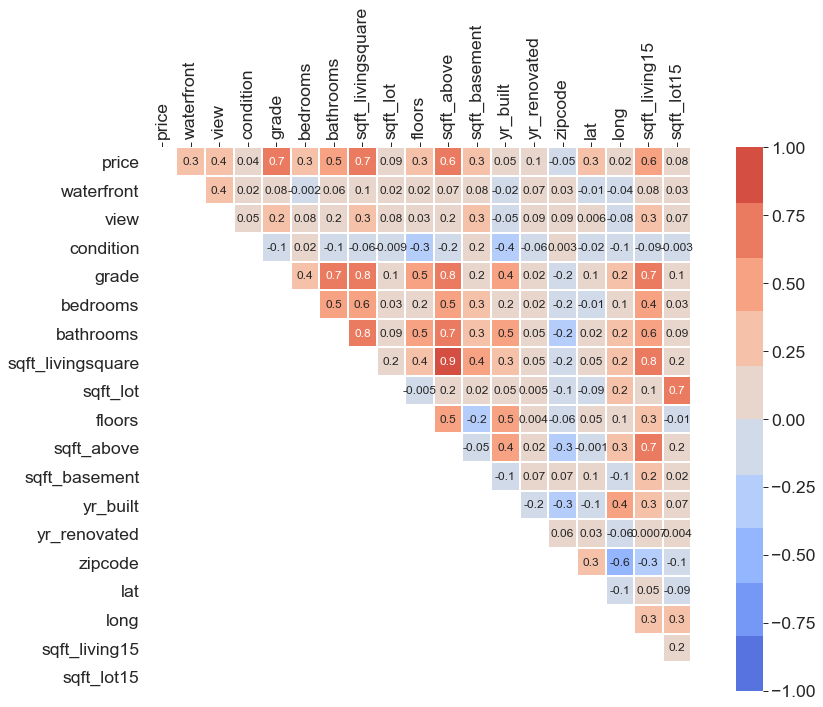

In [19]:
# correlation matrix with all variables


heatmap_list = df[["price","waterfront","view","condition","grade","bedrooms","bathrooms","sqft_livingsquare","sqft_lot","floors","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"]]

sns.set(context="paper", font="monospace", font_scale=2)

corrmat = heatmap_list.corr()
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax.xaxis.tick_top() 
    cmap = sns.color_palette("coolwarm", 10)
    matrix = np.tril(corrmat)
    heatmap = sns.heatmap(corrmat, cmap=cmap, vmin=-1, vmax=1, center= 0, square=True, annot=True, annot_kws={"size": 12}, fmt='.1g', mask=matrix, linewidths=1, rasterized=True);
    

heatmap;




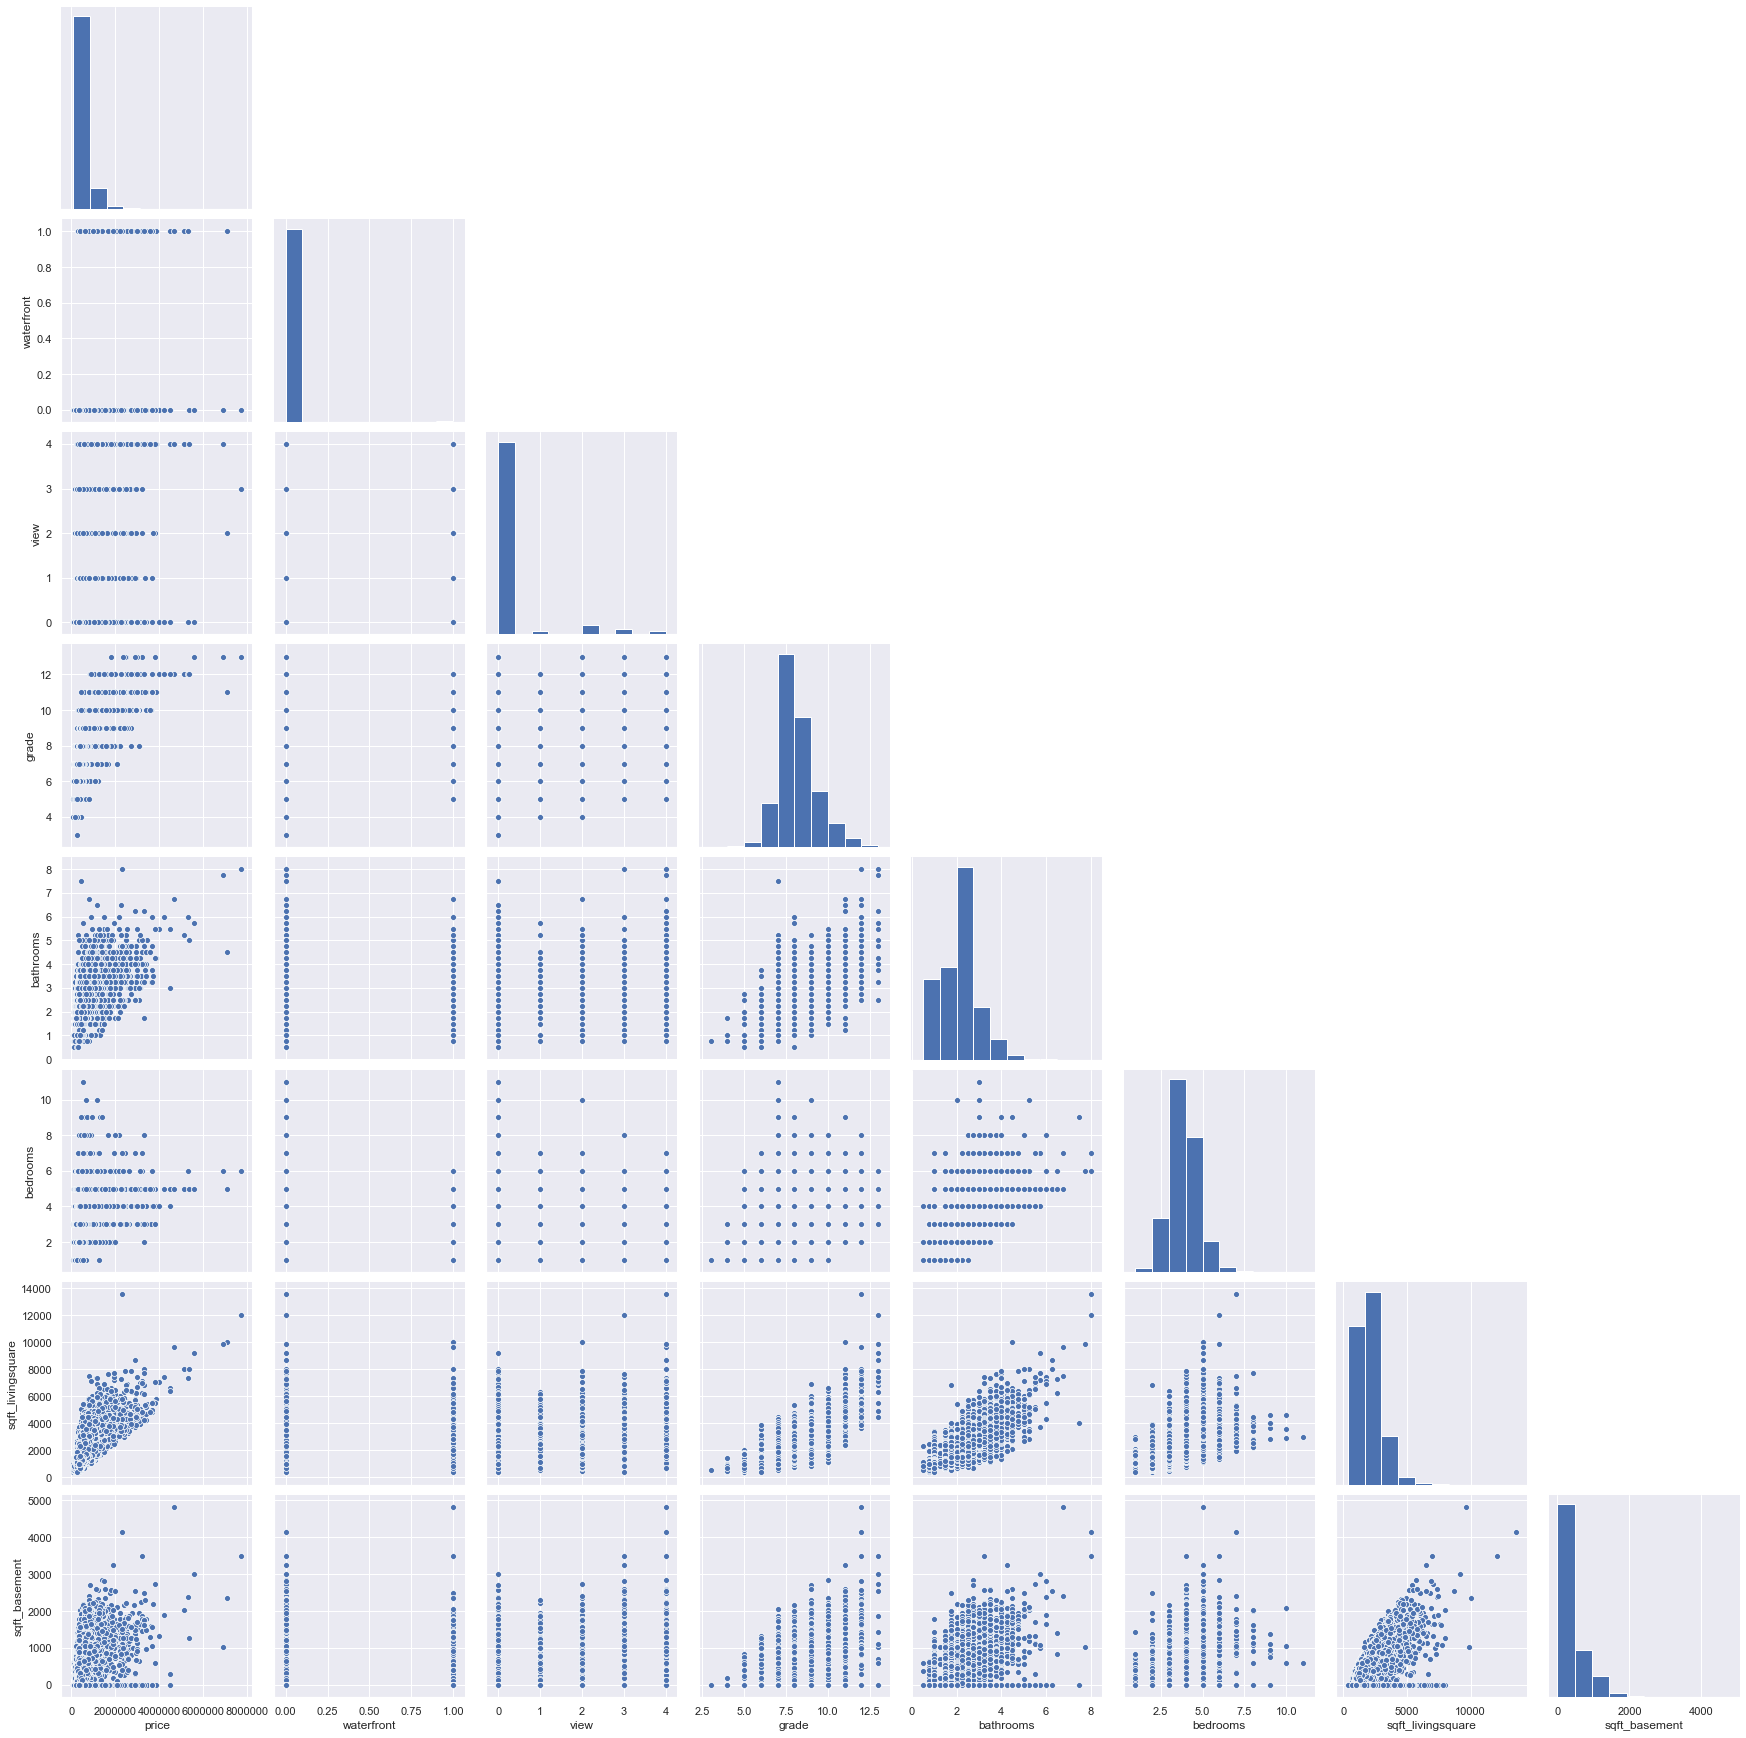

In [20]:
# plot pairplot with correlated variables
# leave out sqft_above and sqft_living15 since highly correlated with sqft_livingsquare

sns.set()
pairplot_list = ['price',"waterfront","view","grade","bathrooms","bedrooms","sqft_livingsquare","sqft_basement"]
sns.pairplot(df[pairplot_list], height = 3,corner=True)
plt.show();

##### distributions prove correlations from heatmap

- --> several categorial variables, check on them later on

##### Visualize the coordinate variables "lat" and "long"

- --> using GeoPandas to visualize distribution
- --> using Shapefile to visualize corresponding zipcodes

In [23]:
# creating Geopandas dataframe
geo_df = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df["long"], df["lat"]))

geo_df.head()

# newly implemented variable geometry appears to the right

,id,date,price,bedrooms,bathrooms,sqft_livingsquare,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0.000,0.000,...,1180,0,1955,0.000,98178,47.511,-122.257,1340,5650,POINT (-122.25700 47.51120)
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,2170,400,1951,1991.000,98125,47.721,-122.319,1690,7639,POINT (-122.31900 47.72100)
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,770,0,1933,0.000,98028,47.738,-122.233,2720,8062,POINT (-122.23300 47.73790)
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,1050,910,1965,0.000,98136,47.521,-122.393,1360,5000,POINT (-122.39300 47.52080)
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,1680,0,1987,0.000,98074,47.617,-122.045,1800,7503,POINT (-122.04500 47.61680)


In [24]:
# give out descriptive statistics for price again in order to set boundaries

print(df.price.median())
df["price"].describe()

450000.0


count     21596.000
mean     540291.957
std      367376.019
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

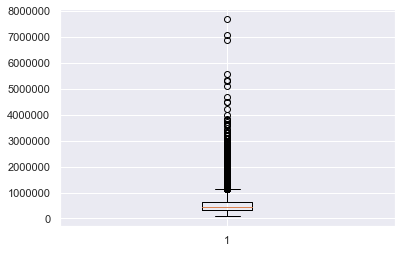

In [28]:
plt.boxplot(df.price);

##### Apparently there are a lot of outliers - related to our business case, we are interested in the high price segment, but are reasonable enough to realize that we have no access to abnormal high selling properties for billionaires, VIPs and such

- --> let's plot different price segments onto a map of King County, price segments will be segmented via the previous boxplot

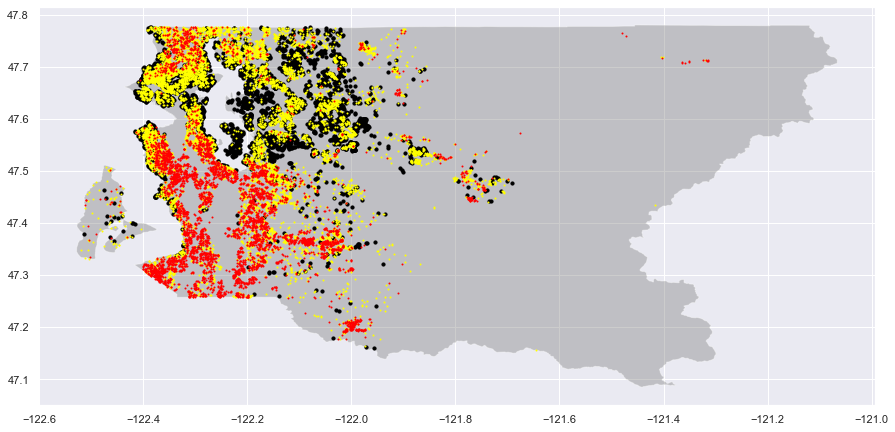

In [36]:
# setup canvas
# shapefile download from open gis data King County website 
street_map_shoreline = gpd.read_file("Maps/King_County_with_Natural_Shoreline_for_Puget_Sound_and_Lake_Washington__kingsh_area.shp")
fig,ax = plt.subplots(figsize=(15,15))
street_map_shoreline.plot (ax = ax, alpha = 0.4, color="grey")

# apply coordinate system
crs = {"init": "epsg:4326"}
geo_df = gpd.GeoDataFrame (df, crs=crs,geometry = geo_df["geometry"])

#define highprice as black, mediumprice as yellow and lowprice as red
high_price_geo_df = geo_df.query("price > 645000 and price <1100000")
medium_price_geo_df = geo_df.query ("price > 322000 and price < 645000")
low_price_geo_df = geo_df.query("price < 322000")
high_price_geo_df.plot(ax = ax, markersize = 10, color="black")
medium_price_geo_df.plot(ax = ax, markersize = 1, color="yellow")
low_price_geo_df.plot(ax = ax, markersize = 1, color="red")

plt.savefig("figures/geomap.png")

- --> houses sold on coastal lines are especially high priced!
- --> different cluster areas can be seen
- --> opportunity to establish new exclusive neighbourhood on island to the left?


##### Attribute zipcodes to high priced neighbourhoods

In [37]:
# use shapefile
# map prep


sns.set(style = "whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

shp_path="Maps/Zipcodes_for_King_County_and_Surrounding_Area__zipcode_area.shp"
kc = shp.Reader(shp_path)

def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df_zip = pd.DataFrame(columns=fields, data=records)
    df_zip = df_zip.assign(coords=shps)
    return df_zip

In [47]:
kc_map= read_shapefile(kc)

# define map of relevant

def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        #plt.text(x0, y0, sf.records()[id][1], fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [46]:
df_sortedby_mean_price = df.groupby("zipcode").mean()["price"]
top_mean_expensive_neighbourhoods = df_sortedby_mean_price.sort_values(ascending=False).head(50)
print(top_mean_expensive_neighbourhoods)

zipcode
98039   2161300.000
98004   1356523.991
98040   1194873.638
98112   1096239.007
98102    899607.673
98109    880077.752
98105    863228.943
98006    859938.554
98119    849714.810
98005    810289.696
98033    803990.819
98199    792187.874
98075    790734.705
98074    685675.844
98077    682885.990
98053    677215.035
98177    676419.392
98008    645628.226
98052    645244.226
98122    634558.145
98115    619944.149
98116    618695.109
98007    617254.021
98027    617053.966
98029    612642.738
98144    594706.542
98024    586120.875
98103    584957.346
98107    579109.808
98117    576834.808
98072    570073.520
98136    551768.521
98065    529629.782
98034    521740.015
98059    493625.310
98011    490377.108
98070    489382.017
98125    469928.768
98166    464322.390
98028    462488.869
98014    455617.113
98045    440232.314
98019    424815.063
98126    424734.605
98155    423736.906
98010    423665.990
98056    420895.475
98118    418019.361
98133    387011.590
98038    367

<Figure size 792x648 with 0 Axes>

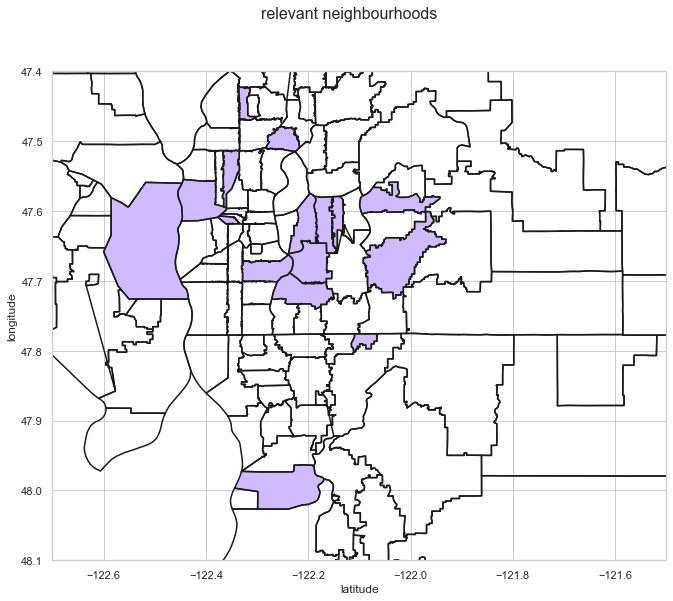

In [51]:
#input all zipcodes above 75%-quartile

liste_zips_top_means = [98112, 98102,98109,98105,98006,98119,98005,98033,98199,98075,98074,98077,98053,98177,98008,98052]

zip_of_rel = list(liste_zips_top_means)

zip_of_all = list(df_sortedby_mean_price)
type(zip_of_all[1])

id_of_rel=[]
for elm in zip_of_rel:
    for idx, elm2 in enumerate(kc.records()):
        if elm2[1] == elm:
            id_of_rel.append(elm2[0])
    
# zoom in with x_lim and y_lim
plot_map_fill_multiples_ids("relevant neighbourhoods",id_of_rel,kc,color="m",x_lim=(-122.7,-121.5),y_lim=(48.1,47.4))
plt.ylabel("longitude")
plt.xlabel("latitude")
plt.show();

##### Data Exploration on categorical variables

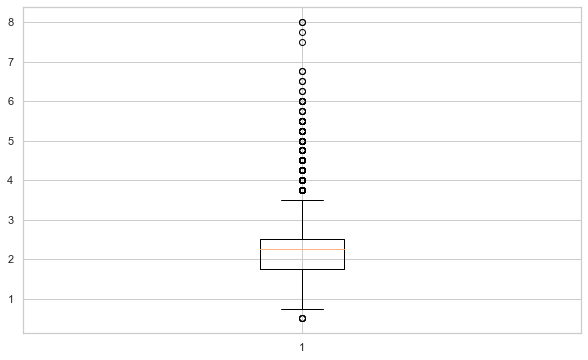

In [53]:
plt.boxplot(x=df.bathrooms);

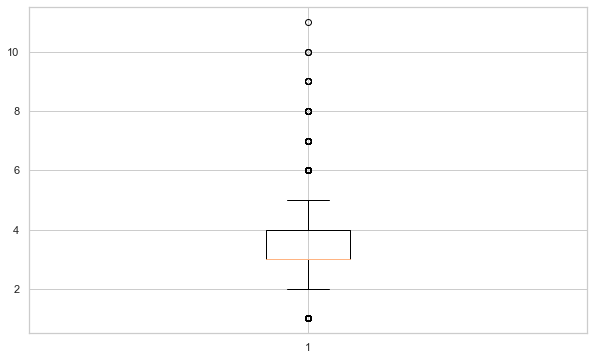

In [54]:
plt.boxplot(x=df.bedrooms);

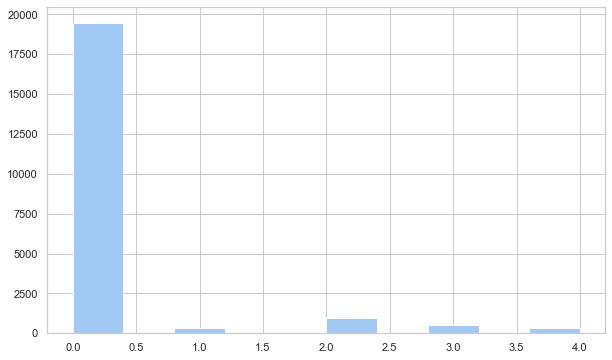

In [55]:
plt.hist(x=df.view);

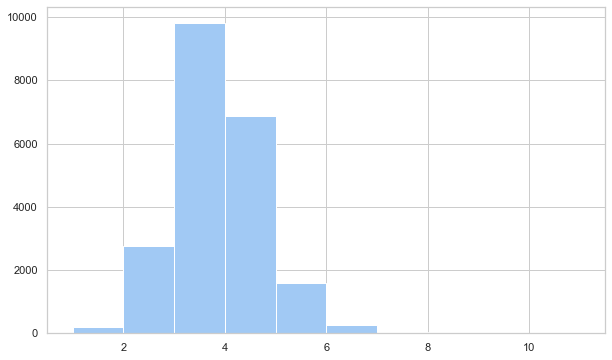

In [56]:
plt.hist(x=df.bedrooms);

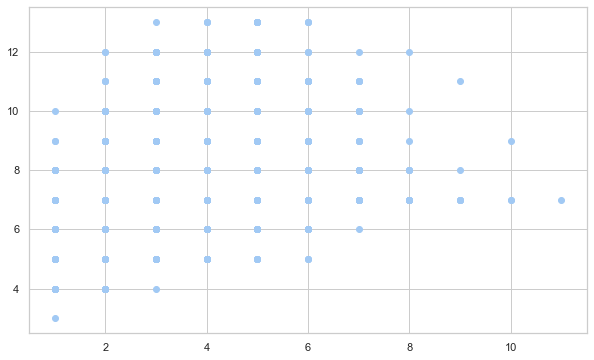

In [58]:
plt.scatter(x=df.bedrooms, y=df.grade)

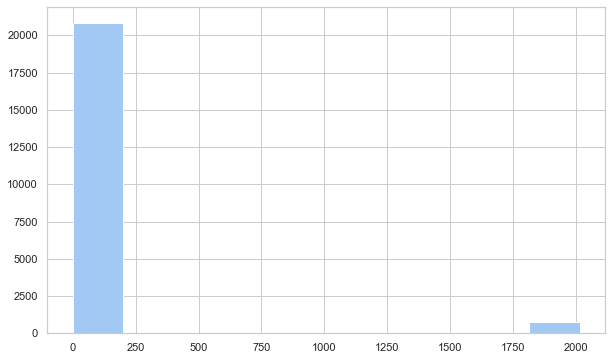

In [62]:
plt.hist(x=df.yr_renovated);

--> not much renovated

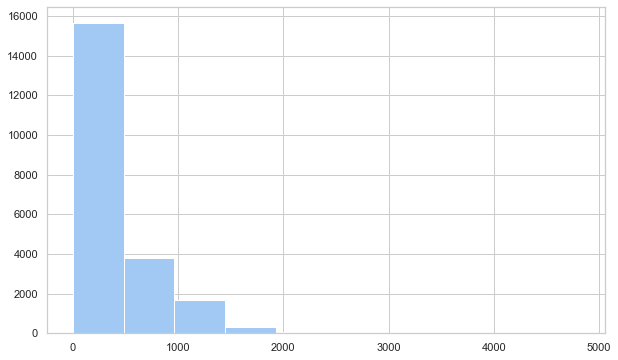

In [64]:
plt.hist (x=df.sqft_basement);

--> very few basements

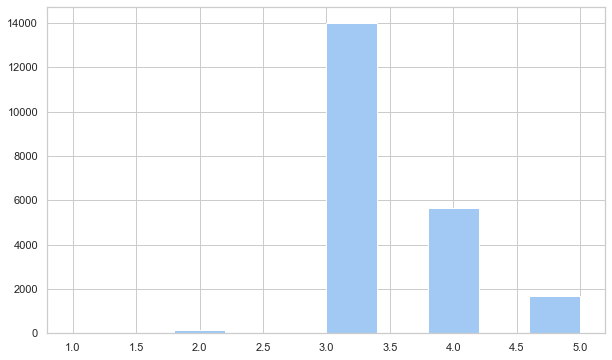

In [61]:
plt.hist(x=df.condition);

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

---
--> almost no value below "3" --> make a dichotome variable

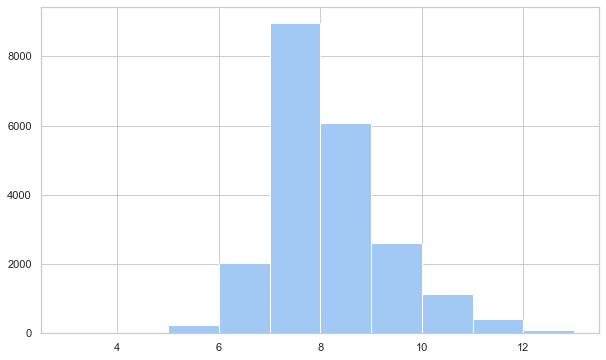

In [65]:
plt.hist(x=df.grade);


1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

---
--> same as for condition applies for grade

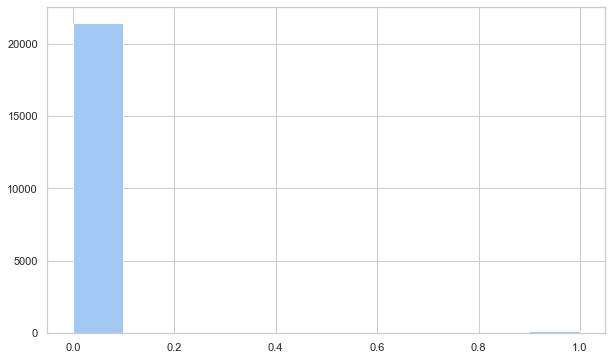

In [67]:
plt.hist(x=df.waterfront);

--> extremely low for whole dataset, look further if there are some implications for high pricing

##### Look at Timeseries

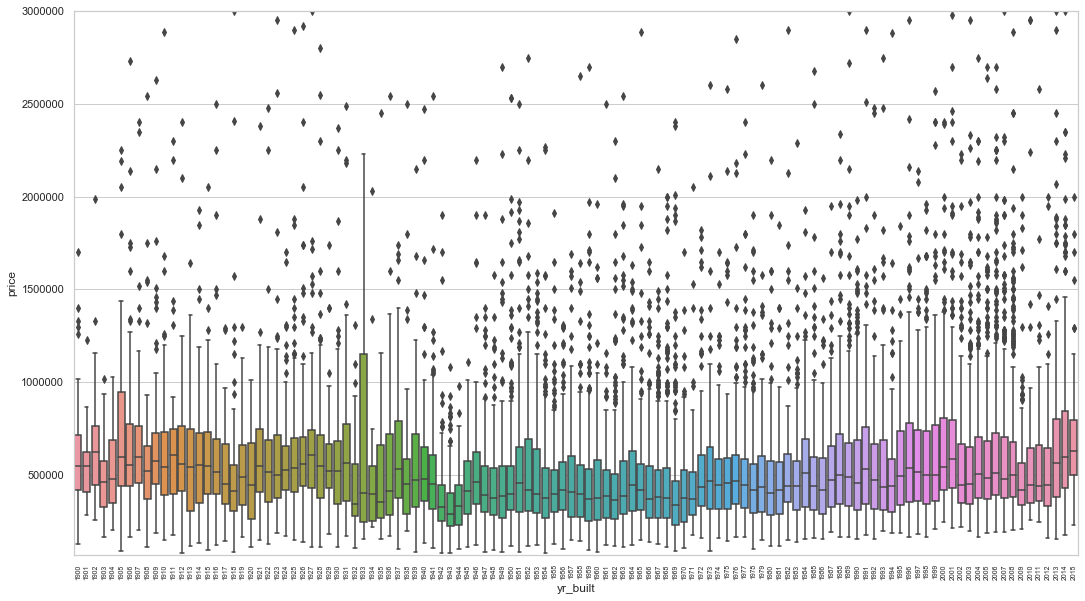

In [68]:
var = 'yr_built'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 10))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=70000, ymax=3000000);
plt.xticks(fontsize = "xx-small",rotation=90);

--> interesting distribution of boxplots, maybe look at this later on in the model

# 5. Feature Engineering

In [69]:
# since business case required a simplified framework, create dichotom categories

# in order to analyse later on compute new series renovated y/n

df.loc[df['yr_renovated'] == 0, 'renovated'] = 0
df.loc[df['yr_renovated'] != 0, 'renovated'] = 1


# in order to analyse later on compute new series basement y/n

df.loc[df['sqft_basement'] == 0, 'basement'] = 0
df.loc[df['sqft_basement'] != 0, 'basement'] = 1


# in order to analyse later on compute new series good_condition y/n

df.loc[df['condition'] < 4, 'good_condition'] = 0
df.loc[df['condition'] >= 4, 'good_condition'] = 1


# in order to analyse later on compute new series quality_grade y/n

df.loc[df['grade'] < 10, 'quality_grade'] = 0
df.loc[df['grade'] >= 10, 'quality_grade'] = 1

df.loc[df['view'] == 0, 'viewed'] = 0
df.loc[df['view'] != 0, 'viewed'] = 1


df

/Users/fabianwerkmeister/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/fabianwerkmeister/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,id,date,price,bedrooms,bathrooms,sqft_livingsquare,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,geometry,renovated,basement,good_condition,quality_grade,viewed
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0.000,0.000,...,47.511,-122.257,1340,5650,POINT (-122.25700 47.51120),0.000,0.000,0.000,0.000,0.000
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,47.721,-122.319,1690,7639,POINT (-122.31900 47.72100),1.000,1.000,0.000,0.000,0.000
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,47.738,-122.233,2720,8062,POINT (-122.23300 47.73790),0.000,0.000,0.000,0.000,0.000
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,47.521,-122.393,1360,5000,POINT (-122.39300 47.52080),0.000,1.000,1.000,0.000,0.000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,47.617,-122.045,1800,7503,POINT (-122.04500 47.61680),0.000,0.000,0.000,0.000,0.000
5,7237550310,2014-05-12,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,47.656,-122.005,4760,101930,POINT (-122.00500 47.65610),0.000,1.000,0.000,1.000,0.000
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,47.310,-122.327,2238,6819,POINT (-122.32700 47.30970),0.000,0.000,0.000,0.000,0.000
7,2008000270,2015-01-15,291850.000,3,1.500,1060,9711,1.000,0.000,0.000,...,47.410,-122.315,1650,9711,POINT (-122.31500 47.40950),0.000,0.000,0.000,0.000,0.000
8,2414600126,2015-04-15,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,47.512,-122.337,1780,8113,POINT (-122.33700 47.51230),0.000,1.000,0.000,0.000,0.000
9,3793500160,2015-03-12,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,47.368,-122.031,2390,7570,POINT (-122.03100 47.36840),0.000,0.000,0.000,0.000,0.000


In [73]:
# arrange new series after yr_renovated, drop ID, since it's irrelevant

df = df[["date","price","bedrooms","bathrooms","sqft_livingsquare","sqft_lot","floors","waterfront","view","viewed","condition","good_condition","grade","quality_grade","sqft_above","sqft_basement","basement","yr_built","yr_renovated","renovated","zipcode","lat","long","sqft_living15","sqft_lot15"]]



###### Shorten dataset to relevant observations

- --> as mentioned before, we are only interested in high selling houses, but not in abnormal high selling houses for eg. billionaires/VIPs
- --> --> created model based on the highest 25% of sales prices!!
- - --> chose an interval, so that all heavy outliers are eliminated, you won't get to the ultra-high-selling vips at the start of your career, so keep it basic but high price!

In [70]:
#creating high price dataset, derived from previous findings

df_high_price = df.query("price>645000 and price<1100000")
df_high_price = df_high_price.dropna()

print(df_high_price.shape)

(4143, 27)


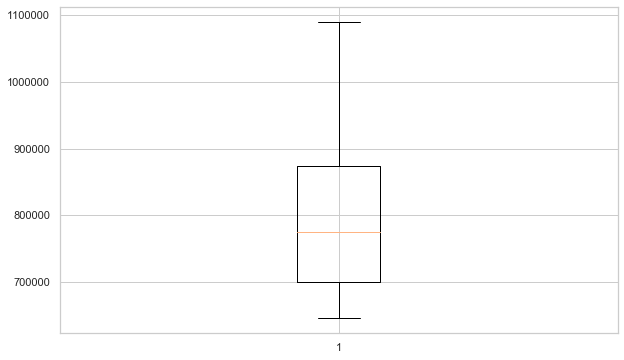

In [71]:
plt.boxplot(df_high_price.price);

--> no abnormal high outliers

# 6. Predictive Modeling

##### Consecutive Regression and Evaluation

--> "Bottom up"-approach == start with few variables and then ascend

##### Model 1

In [84]:
# test model with sqft_livingsquare
X_high_price = df_high_price[["sqft_livingsquare"]]
y = df_high_price["price"]

# Split data
X_high_price_train, X_high_price_test, y_train, y_test = train_test_split(X_high_price, y,random_state = 1021)

# Instantiate model
high_price_model = LinearRegression()

# Fit Model
high_price_model.fit(X_high_price_train, y_train)

# Predict
y_pred_high_price_model = high_price_model.predict(X_high_price_test)

# RMSE
print("RMSE is:")
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_high_price_model)))
print("Mean squared error in percentage is:")
print((np.sqrt(metrics.mean_squared_error(y_test, y_pred_high_price_model)))/df_high_price["price"].mean())
print("-----------------------")
print("Model constant is:")
print(high_price_model.intercept_)
print("-----------------------")
print("Model coeff are:")
for i in high_price_model.coef_:
        print(i)

y_true_high_price_model = df_high_price.price
y_pred_high_price_model = high_price_model.predict(X = X_high_price)

# calculate MAE, MSE
print("Mean absolute error is:")
print(metrics.mean_absolute_error(y_true_high_price_model, y_pred_high_price_model))
print("Mean absolute error in percentage is:")
print((metrics.mean_absolute_error(y_true_high_price_model, y_pred_high_price_model))/df_high_price["price"].mean())
print("Mean squared error (without square root) is:")
print(metrics.mean_squared_error(y_true_high_price_model, y_pred_high_price_model))


RMSE is:
101702.97877481511
Mean squared error in percentage is:
0.12757384564429347
-----------------------
Model constant is:
659378.6047521888
-----------------------
Model coeff are:
50.802398021957245
Mean absolute error is:
86320.92113149307
Mean absolute error in percentage is:
0.10827895112772569
Mean squared error (without square root) is:
11159348630.19511


In [87]:
smf.ols(formula="price ~ sqft_livingsquare", data=df_high_price).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     597.3
Date:                Fri, 06 Mar 2020   Prob (F-statistic):          2.39e-123
Time:                        01:36:44   Log-Likelihood:                -53804.
No. Observations:                4143   AIC:                         1.076e+05
Df Residuals:                    4141   BIC:                         1.076e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.571e+05   5961.231    110.237      0.000    6.45e+05    6.69e+05
sqft_livingsquare    51.2717      2.098     24.440      0.000      47.159      55.385
==============================================================================
Omnibus:                      253.839   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.826
Skew:                           0.649   Prob(JB):                     2.13e-65
Kurtosis:                       2.799   Cond. No.                     1.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Model 2

In [85]:
# test model with sqft_livingsquare and yr_built

X_high_price = df_high_price[["sqft_livingsquare" , "yr_built"]] 

y = df_high_price["price"]

# Split data
X_high_price_train, X_high_price_test, y_train, y_test = train_test_split(X_high_price, y,random_state = 1021)

# Instantiate model
high_price_model = LinearRegression()

# Fit Model
high_price_model.fit(X_high_price_train, y_train)

# Predict
y_pred_high_price_model = high_price_model.predict(X_high_price_test)

# RMSE
print("RMSE is:")
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_high_price_model)))
print("Mean squared error in percentage is:")
print((np.sqrt(metrics.mean_squared_error(y_test, y_pred_high_price_model)))/df_high_price["price"].mean())
print("-----------------------")
print("Model constant is:")
print(high_price_model.intercept_)
print("-----------------------")
print("Model coeff are:")
for i in high_price_model.coef_:
        print(i)

y_true_high_price_model = df_high_price.price
y_pred_high_price_model = high_price_model.predict(X = X_high_price)

# calculate MAE, MSE
print("Mean absolute error is:")
print(metrics.mean_absolute_error(y_true_high_price_model, y_pred_high_price_model))
print("Mean absolute error in percentage is:")
print((metrics.mean_absolute_error(y_true_high_price_model, y_pred_high_price_model))/df_high_price["price"].mean())
print("Mean squared error (without square root) is:")
print(metrics.mean_squared_error(y_true_high_price_model, y_pred_high_price_model))


RMSE is:
100182.64962295754
Mean squared error in percentage is:
0.12566678019857985
-----------------------
Model constant is:
1707924.6631444306
-----------------------
Model coeff are:
61.33774050949526
-546.128788889682
Mean absolute error is:
84799.0228052658
Mean absolute error in percentage is:
0.10636991734626378
Mean squared error (without square root) is:
10900712659.475359


In [88]:
smf.ols(formula="price ~ sqft_livingsquare + yr_built", data=df_high_price).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     354.9
Date:                Fri, 06 Mar 2020   Prob (F-statistic):          5.34e-143
Time:                        01:37:14   Log-Likelihood:                -53755.
No. Observations:                4143   AIC:                         1.075e+05
Df Residuals:                    4140   BIC:                         1.075e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.737e+06   1.09e+05     15.938      0.000    1.52e+06    1.95e+06
sqft_livingsquare    62.4135      2.358     26.469      0.000      57.791      67.036
yr_built           -563.1370     56.742     -9.925      0.000    -674.381    -451.893
==============================================================================
Omnibus:                      233.674   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.039
Skew:                           0.628   Prob(JB):                     3.11e-60
Kurtosis:                       2.908   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
X_high_price = df_high_price[["sqft_livingsquare" , "yr_built","bedrooms","bathrooms","quality_grade","renovated","waterfront"]] 
y = df_high_price["price"]

# Split data
X_high_price_train, X_high_price_test, y_train, y_test = train_test_split(X_high_price, y,random_state = 1021)

# Instantiate model
high_price_model = LinearRegression()

# Fit Model
high_price_model.fit(X_high_price_train, y_train)

# Predict
y_pred_high_price_model = high_price_model.predict(X_high_price_test)

# RMSE
print("RMSE is:")
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_high_price_model)))
print("Mean squared error in percentage is:")
print((np.sqrt(metrics.mean_squared_error(y_test, y_pred_high_price_model)))/df_high_price["price"].mean())
print("-----------------------")
print("Model constant is:")
print(high_price_model.intercept_)
print("-----------------------")
print("Model coeff are:")
for i in high_price_model.coef_:
        print(i)

y_true_high_price_model = df_high_price.price
y_pred_high_price_model = high_price_model.predict(X = X_high_price)

# calculate MAE, MSE
print("Mean absolute error is:")
print(metrics.mean_absolute_error(y_true_high_price_model, y_pred_high_price_model))
print("Mean absolute error in percentage is:")
print((metrics.mean_absolute_error(y_true_high_price_model, y_pred_high_price_model))/df_high_price["price"].mean())
print("Mean squared error (without square root) is:")
print(metrics.mean_squared_error(y_true_high_price_model, y_pred_high_price_model))


RMSE is:
99752.95112163795
Mean squared error in percentage is:
0.12512777641578696
-----------------------
Model constant is:
1953433.0097473338
-----------------------
Model coeff are:
48.182438891795606
-662.288503098215
-7933.660620453541
14948.44049691952
52496.60551343143
31423.039068086015
45372.7114272321
Mean absolute error is:
83167.28066237163
Mean absolute error in percentage is:
0.10432309804188743
Mean squared error (without square root) is:
10510560646.477262


--> bedrooms as a negative coeff makes no sense, so drop it

##### Model 4

In [83]:
X_high_price = df_high_price[["sqft_livingsquare" , "yr_built","bathrooms","quality_grade","renovated","waterfront"]] 
y = df_high_price["price"]

# Split data
X_high_price_train, X_high_price_test, y_train, y_test = train_test_split(X_high_price, y,random_state = 1021)

# Instantiate model
high_price_model = LinearRegression()

# Fit Model
high_price_model.fit(X_high_price_train, y_train)

# Predict
y_pred_high_price_model = high_price_model.predict(X_high_price_test)

# RMSE
print("RMSE is:")
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_high_price_model)))
print("Mean squared error in percentage is:")
print((np.sqrt(metrics.mean_squared_error(y_test, y_pred_high_price_model)))/df_high_price["price"].mean())
print("-----------------------")
print("Model constant is:")
print(high_price_model.intercept_)
print("-----------------------")
print("Model coeff are:")
for i in high_price_model.coef_:
        print(i)

y_true_high_price_model = df_high_price.price
y_pred_high_price_model = high_price_model.predict(X = X_high_price)

# calculate MAE, MSE
print("Mean absolute error is:")
print(metrics.mean_absolute_error(y_true_high_price_model, y_pred_high_price_model))
print("Mean absolute error in percentage is:")
print((metrics.mean_absolute_error(y_true_high_price_model, y_pred_high_price_model))/df_high_price["price"].mean())
print("Mean squared error (without square root) is:")
print(metrics.mean_squared_error(y_true_high_price_model, y_pred_high_price_model))


RMSE is:
99625.2394279413
Mean squared error in percentage is:
0.1249675778444678
-----------------------
Model constant is:
1855711.7632793135
-----------------------
Model coeff are:
44.23209117676879
-619.3943799761416
12377.235892305573
55240.4509800559
33747.46097265623
47734.05649441727
Mean absolute error is:
83161.3928293401
Mean absolute error in percentage is:
0.10431571248139163
Mean squared error (without square root) is:
10529802189.894543


In [92]:
smf.ols(formula="price ~ sqft_livingsquare + yr_built + bathrooms + quality_grade + renovated + waterfront", data=df_high_price).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     147.2
Date:                Fri, 06 Mar 2020   Prob (F-statistic):          1.07e-169
Time:                        01:42:11   Log-Likelihood:                -53682.
No. Observations:                4143   AIC:                         1.074e+05
Df Residuals:                    4136   BIC:                         1.074e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.881e+06   1.16e+05     16.264      0.000    1.65e+06    2.11e+06
sqft_livingsquare    47.0606      3.013     15.617      0.000      41.153      52.968
yr_built           -633.4427     60.347    -10.497      0.000    -751.756    -515.130
bathrooms          1.041e+04   3321.296      3.136      0.002    3902.957    1.69e+04
quality_grade      5.088e+04   4645.338     10.953      0.000    4.18e+04       6e+04
renovated          2.556e+04   7403.492      3.452      0.001     1.1e+04    4.01e+04
waterfront         5.394e+04   1.95e+04      2.764      0.006    1.57e+04    9.22e+04
==============================================================================
Omnibus:                      245.566   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.966
Skew:                           0.649   Prob(JB):                     6.57e-64
Kurtosis:                       2.991   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 7. Major Takeaways

1. According to regression, to sell high, you should have to have houses in your portfolio, which should be in good shape and/or are renovated. This also leads to a good quality grade, which also raises sales prices

2. Derived from regression and geo-mapping you should also have houses with a waterfront view in your portfolio because they sell high

3. Derived from geo-mapping, there could be a big opportunity to create a new exclusive neighbourhood on Vashon Island!

# 8. Further investigation needed

- didn't take into account any of the two variables with "15" 
- --> could maybe divided by 15 to get a mean for every 15 neighbours and then somehow derive a "neighbourhood" or "neighbourhood"-values
- there a definitely more opportunities to have a deeper look into more features to engineer, especially since categories were made to dichtotome variables. So would be better to create several dummies from these variables
- Vashon Island looks interesting, as pointed out in the implications, but would be better to investigate further, especially in terms of when houses were built and how it looks there in general
- --> probably not suited for "exclusive neighbourhood"